In [2]:
import torch
import numpy as np

data = [[1,2],[3,4]]
x_data = torch.tensor(data)  #데이터의 자료형은 자동 유추

np_array = np.array(data)
x_np = torch.from_numpy(np_array)

x_ones = torch.ones_like(x_data)
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float)
print(f"Random Tensor: \n {x_rand} \n")


Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.4890, 0.4606],
        [0.3289, 0.9627]]) 



In [ ]:
shape = (2,3,)

rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}\n")

tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Random Tensor: 
 tensor([[0.6740, 0.3731, 0.9509],
        [0.2588, 0.5700, 0.9741]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])

tensor([[0.1476, 0.0997, 0.8962, 0.3352],
        [0.5802, 0.2984, 0.4375, 0.8566],
        [0.7035, 0.2224, 0.0342, 0.9179]])
Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


In [17]:
if torch.cuda.is_available():
    tensor = tensor.to("cuda")

tensor = torch.ones(4,4)
print(f"First row: {tensor[0]}")
print(f"First column: {tensor[:,0]}")
print(f"Last column: {tensor[...,-1]}")
tensor[...,-2] = 0
print(tensor)

t1 = torch.cat([tensor, tensor, tensor], dim =1)
print(t1)

First row: tensor([1., 1., 1., 1.])
First column: tensor([1., 1., 1., 1.])
Last column: tensor([1., 1., 1., 1.])
tensor([[1., 1., 0., 1.],
        [1., 1., 0., 1.],
        [1., 1., 0., 1.],
        [1., 1., 0., 1.]])
tensor([[1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1.],
        [1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1.],
        [1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1.],
        [1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1.]])


In [27]:
y1 = tensor @ tensor.T    # @ 연산자는 torch.matmul(A,B) 와 같음
y2 = tensor.matmul(tensor.T)

y3 = torch.rand_like(y1)
torch.matmul(tensor, tensor.T, out=y3)   # y3에 결과를 저장

z1 = tensor * tensor    #각 요소별 곱
z2 = tensor.mul(tensor)

z3 = torch.rand_like(tensor)
print(z3)
torch.mul(tensor, tensor, out=z3)
print(z3)

tensor([[0.3849, 0.7865, 0.7703, 0.6781],
        [0.7062, 0.0860, 0.1350, 0.2001],
        [0.6646, 0.7828, 0.5969, 0.4866],
        [0.5585, 0.1394, 0.4624, 0.7836]])
tensor([[1., 1., 0., 1.],
        [1., 1., 0., 1.],
        [1., 1., 0., 1.],
        [1., 1., 0., 1.]])


In [ ]:
agg = tensor.sum()  # 텐서 안 모든 요소들의 합, 데이터 타입은 여전히 텐서
print(agg)
agg_item = agg.item()  # 데이터 타입을 텐서에서 기본 숫자 타입으로 변환
print(agg_item, type(agg_item))

tensor(12.)
12.0 <class 'float'>


In [ ]:
print(f"{tensor} \n")
tensor.add_(5)  # (in-place 연산 : 연산 결과를 피연산자에 저장)각 요소에 +5
print(tensor)

tensor([[1., 1., 0., 1.],
        [1., 1., 0., 1.],
        [1., 1., 0., 1.],
        [1., 1., 0., 1.]]) 

tensor([[6., 6., 5., 6.],
        [6., 6., 5., 6.],
        [6., 6., 5., 6.],
        [6., 6., 5., 6.]])


In [36]:
t = torch.ones(5)
print(f"t: {t}", type(t))
n = t.numpy()
print(f"n: {n}", type(n))

t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.]) <class 'torch.Tensor'>
n: [1. 1. 1. 1. 1.] <class 'numpy.ndarray'>
t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


In [42]:
n = np.ones(5)
t = torch.from_numpy(n)

np.add(n,1,out=n)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]


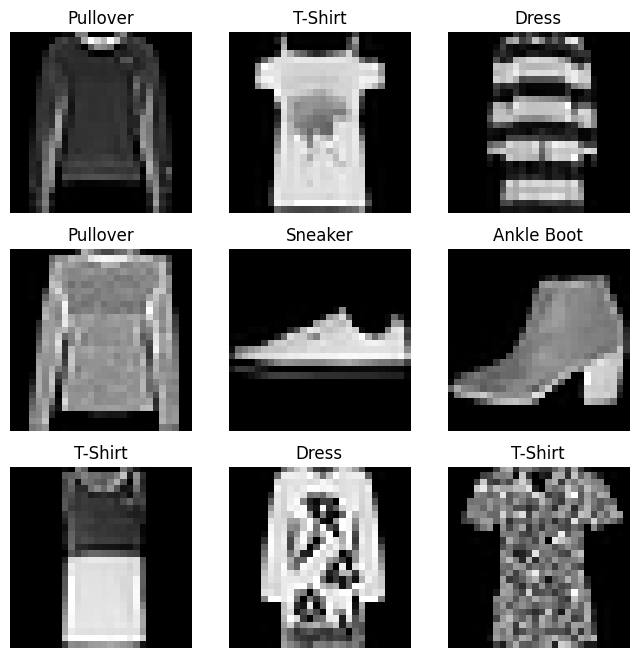

In [13]:
#root 는 학습/테스트 데이터가 저장되는 경로
# data 폴더가 생긴 이유도 해당 코드 때문
# transform과 target_transform은 데이터 전처리를 적용하기 위한 코드 
# transform 입력 데이터에 적용되는 변환 함수, 보통 이미지 데이터를 텐서로 바꾸는데 사용
# transform=ToTensor() # 이미지 데이터를 torch.Tensor 형태로 바꿔줌
# ToTensor()는 픽셀 값을 0~1 사이로 정규화해줌

import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST(
    root = "data",
    train=True,
    download=True,
    transform = ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform = ToTensor()
)

labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize = (8,8))   # 가로, 세로 8인치 크기의 사각형 캔버스를 만듦
cols,rows = 3,3
for i in range(1,cols*rows+1):
    sample_idx = torch.randint(len(training_data), size = (1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows,cols,i)  # figure라는 캔버스 위에 여러 개의 작은 그래프를 그릴 수 있도록 그리드 형태의 공간을 나누는 것
    plt.title(labels_map[label])
    plt.axis("off")  # matplotlib은 기본적으로 x축,y축 숫자 눈금이 표시되는데 해당 표시(좌표축)를 숨기는 것
    plt.imshow(img.squeeze(), cmap="gray")  # img : fashionMNIST는 (1,28,28)모양의 이미 텐서를 반환함, squeeze는 불필요한 차원(1인 차원을 제거하는것)   # cmap : 컬러맵 설정
plt.show()

In [ ]:
#사용자 정의 Dataset 클래스는 반드시 3개 함수를 구현해야 함 __init__, __len__, __getitem__
import os  # 운영체제와 상호작용할 수 있는 기능
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform = None):
        self.img_labels = pd.read_csv(annotations_file, names = ['file_name','label'])
        self.img_dir = img_dir
        self.transform = transform
        self. target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)
    
    def __getitem__(self,idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx,0])  	# 경로를 운영 체제에 맞게 변환(이미지 파일의 전체 경로를 만들어냄)
        image = read_image(img_path)   # 이미지 파일을 텐서 형태로 불러옴
        label = self.img_labels.iloc[idx,1]   # 해당 이미지의 라벨 값(정수형)
        if self.transform:  # transform이 지정되어 있다면 이미지에 전처리 적용
            image = self.transform(image)
        if self.target_transform: # 라벨에도 전처리 적용
            label = self.target_transform(label)
        return image, label